In [2]:
from rasterio import features
from shapely.geometry import shape
import rasterio
import pickle
import numpy as np
from rasterio import mask
import geopandas as gpd
import fiona
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [1]:
dir_list = os.listdir("./hour_graphs/") 
isoc = {}
for i in tqdm(range(len(dir_list))):
    with open(f"../data/hour_graphs/{dir_list[i]}", "rb") as file:
        hr_graph = pickle.load(file)
        if i == 10:
            quit()
        with rasterio.open('./landscape/Input_Geotiff.tif') as f:
            
            image = f.read(1)
            # use f.nodata if possible; it's not defined on this particular image
            nodata = -9999.0
            # create a binary image, 0 where there's nodata, 1 where it's valid
            dims = f.read(1).shape
            mask = np.zeros(dims, dtype=np.bool_).astype(np.uint8)
            for t in hr_graph:
                for k,j in hr_graph[t][0]:
                    idx = np.unravel_index(k, (1173, 1406))
                    idx2 = np.unravel_index(j, (1173, 1406))
                    mask[(idx[0]-7),(idx[1])] = True
                    mask[(idx2[0]-7),(idx2[1])] = True
                    print(image[idx[0]-7, idx[1]-7])
                    if image[idx[0]-7, idx[1]-7] == nodata:
                        quit()
                mask = mask.astype(np.uint8)
                # vectorize the binary image, supplying the transform so it returns maps coords
                for coords, value in features.shapes(mask, transform=f.transform):
                    # ignore polygons corresponding to nodata
                    if value != 0:
                        # convert geojson to shapely geometry
                        geom = shape(coords)
                # use the feature loop in case you polygon is a multipolygon
                features_ = [0]
                # add crs using wkt or EPSG to have a .prj file
                gdr = gpd.GeoDataFrame({'feature': features_, 'geometry': geom}) #, crs='EPSG:4326)
                
                gdr.to_file("./isocrowns/isos.shp")
                with fiona.open("./isocrowns/isos.shp", "r") as shapefile:
                    shapes = [feature["geometry"] for feature in shapefile]
                out_image, out_transform = rasterio.mask.mask(f, shapes, crop=False)
                out_meta = f.meta
                out_meta.update({"driver": "GTiff",
                                 "count":1,
                                 "height": out_image.shape[1],
                                 "width": out_image.shape[2],
                                 "transform": out_transform,
                                 "dtype": "int32"}
                               )
                with rasterio.open(f"./isocrowns/{i}-{t}.tif", "w", **out_meta) as dest:
                    dest.write(np.expand_dims(out_image[0], axis=0))

NameError: name 'os' is not defined

In [6]:
with open(f"../data/hour_graphs/{dir_list[10]}", "rb") as file:
        hr_graph = pickle.load(file)

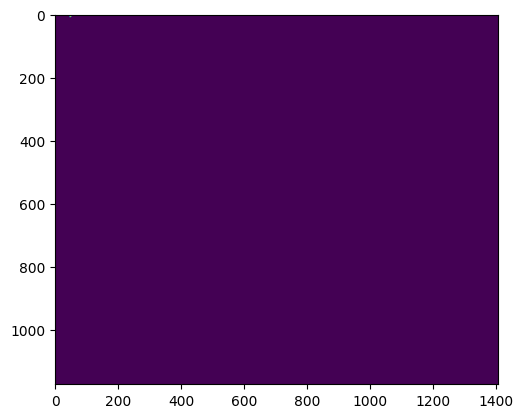

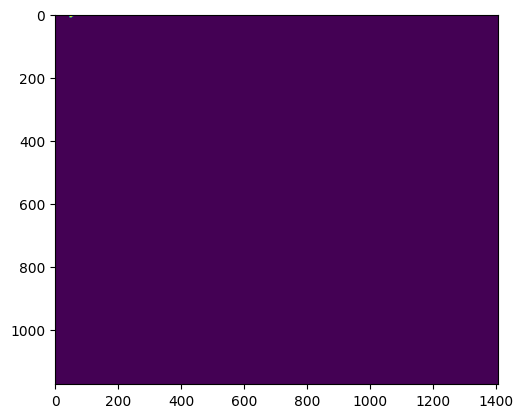

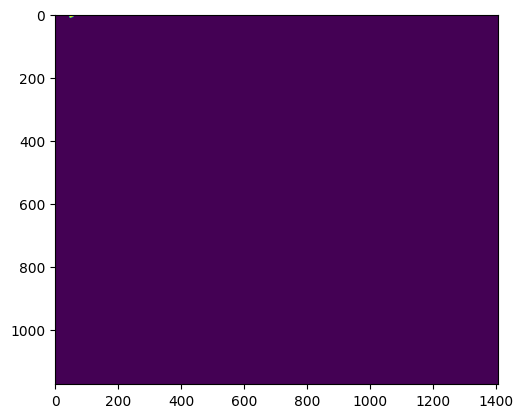

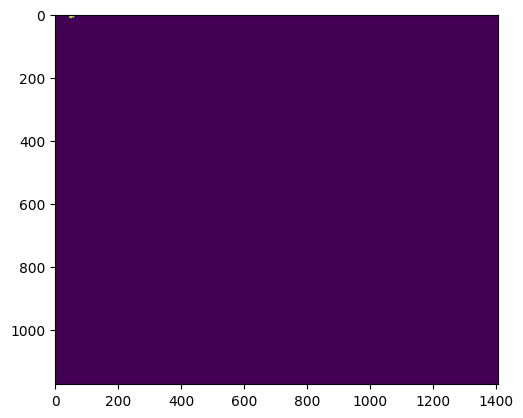

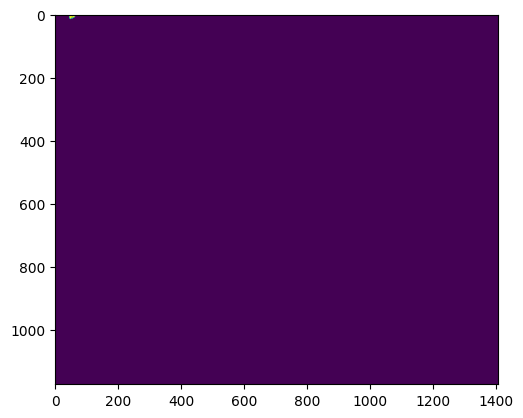

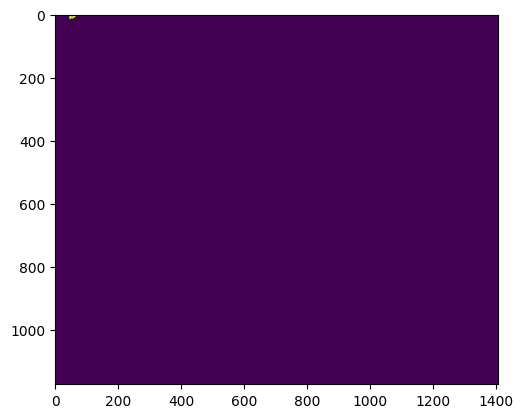

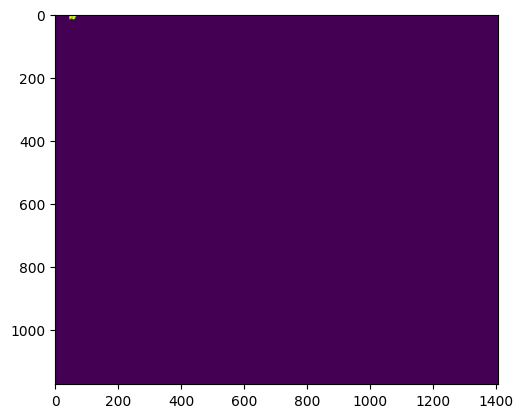

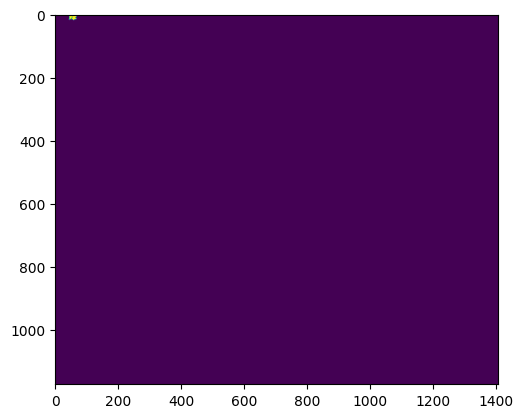

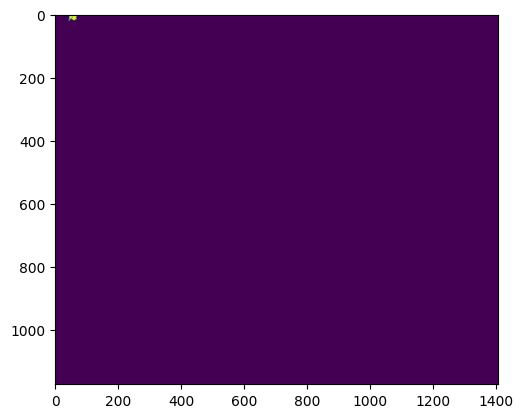

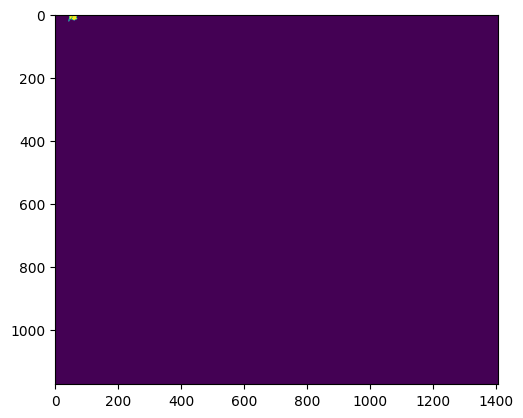

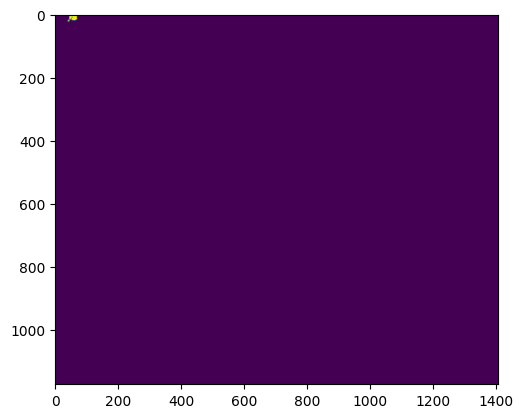

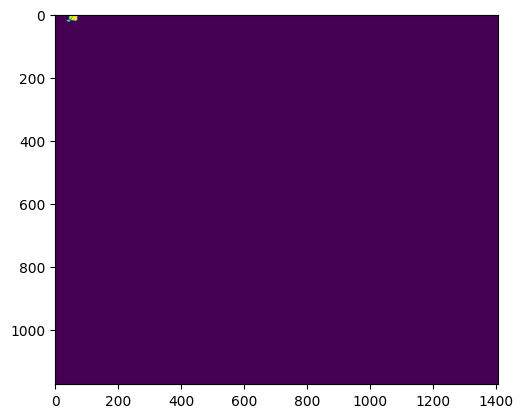

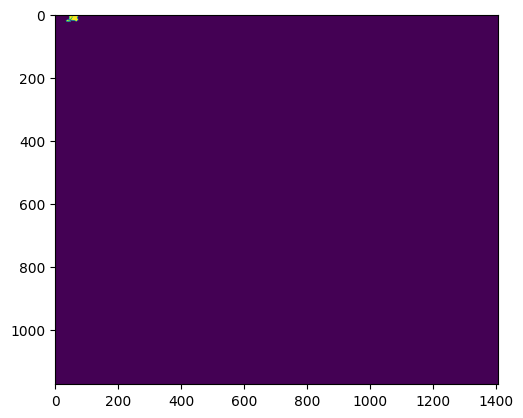

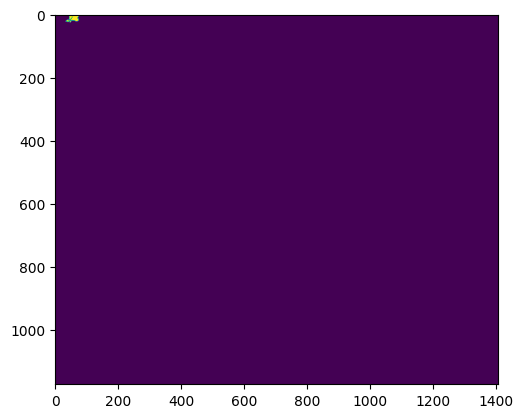

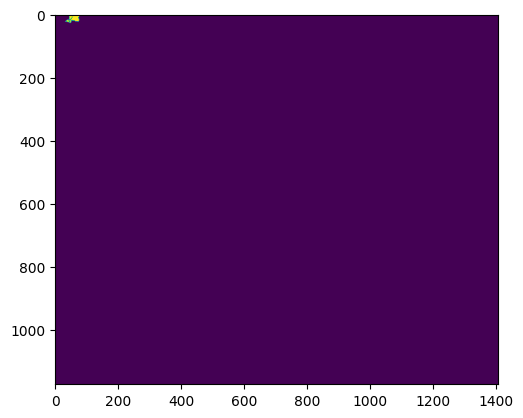

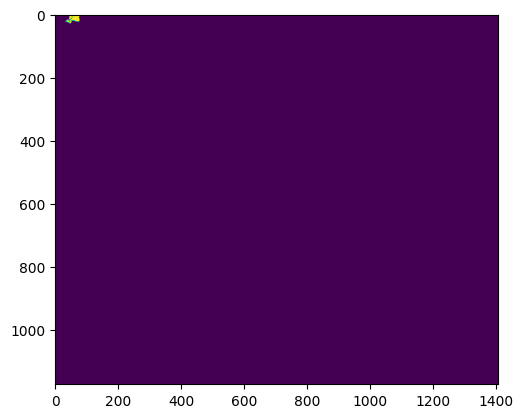

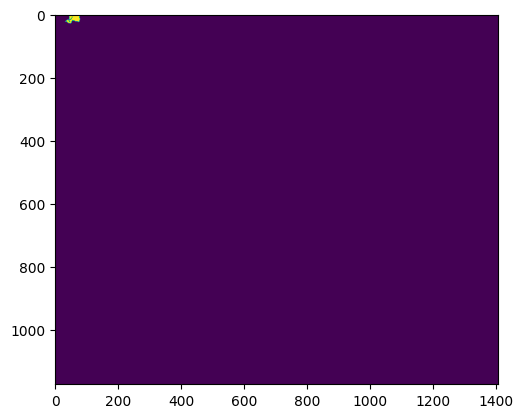

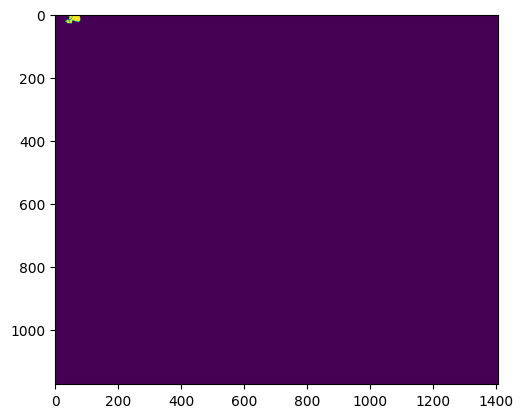

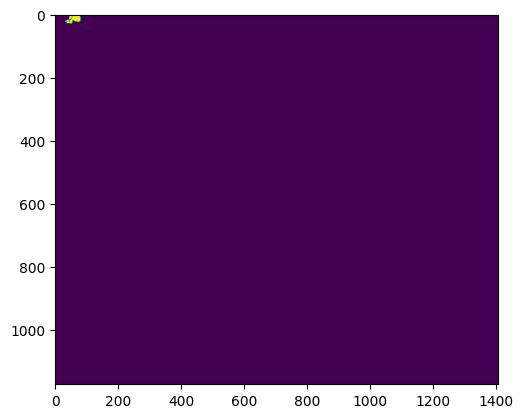

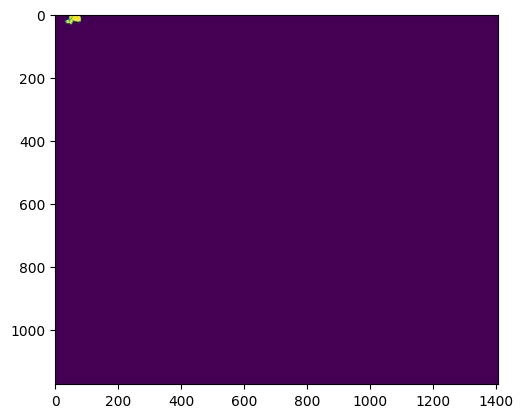

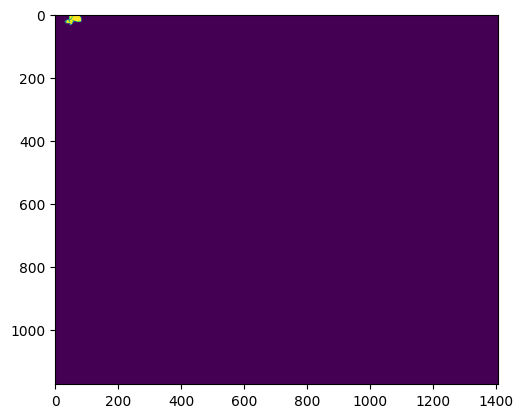

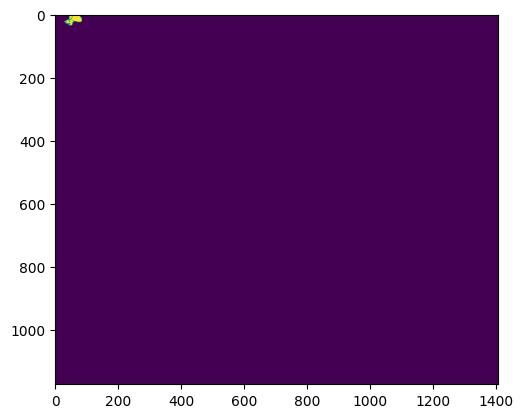

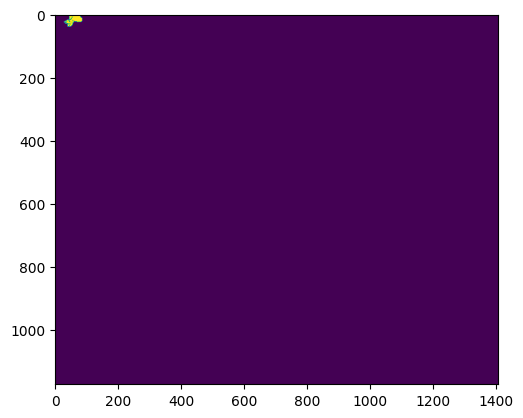

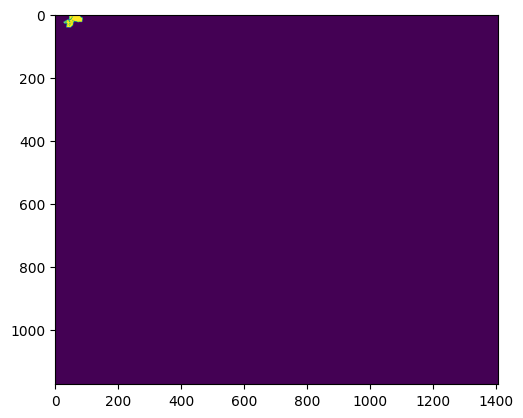

In [21]:
mask = np.zeros(dims, dtype=np.bool_).astype(np.uint8)
for t in hr_graph:
    for k,j in hr_graph[t][0]:
        idx = np.unravel_index(k, (1173, 1406))
        idx2 = np.unravel_index(j, (1173, 1406))
        mask[(idx[0]),(idx[1])] = True
        mask[(idx2[0]),(idx2[1])] = True
    plt.imshow(mask)
    plt.show()

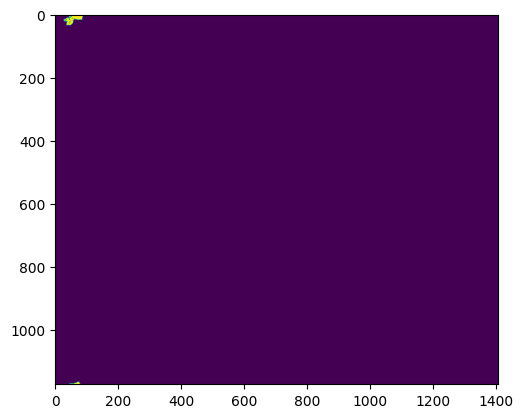